In [ ]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

%config InlineBackend.figure_format = 'retina'

# General fig dim and colors
fs = (20,10)
pal = 'CMRmap_r'


In [3]:
df = pd.read_csv('C:/Users/Adim/Downloads/bhoomika/irisdataset.csv').drop('Id', axis=1)
display( df )

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
display( pd.DataFrame(df.Species.value_counts()) )

Species
Iris-setosa           50
Iris-versicolor       50
Iris-virginica        50

In [6]:
df.describe().T.iloc[0:, 1:].style.background_gradient(cmap=pal)

C:\Users\Adim\AppData\Local\Temp\ipykernel_664\1391020143.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=pal)


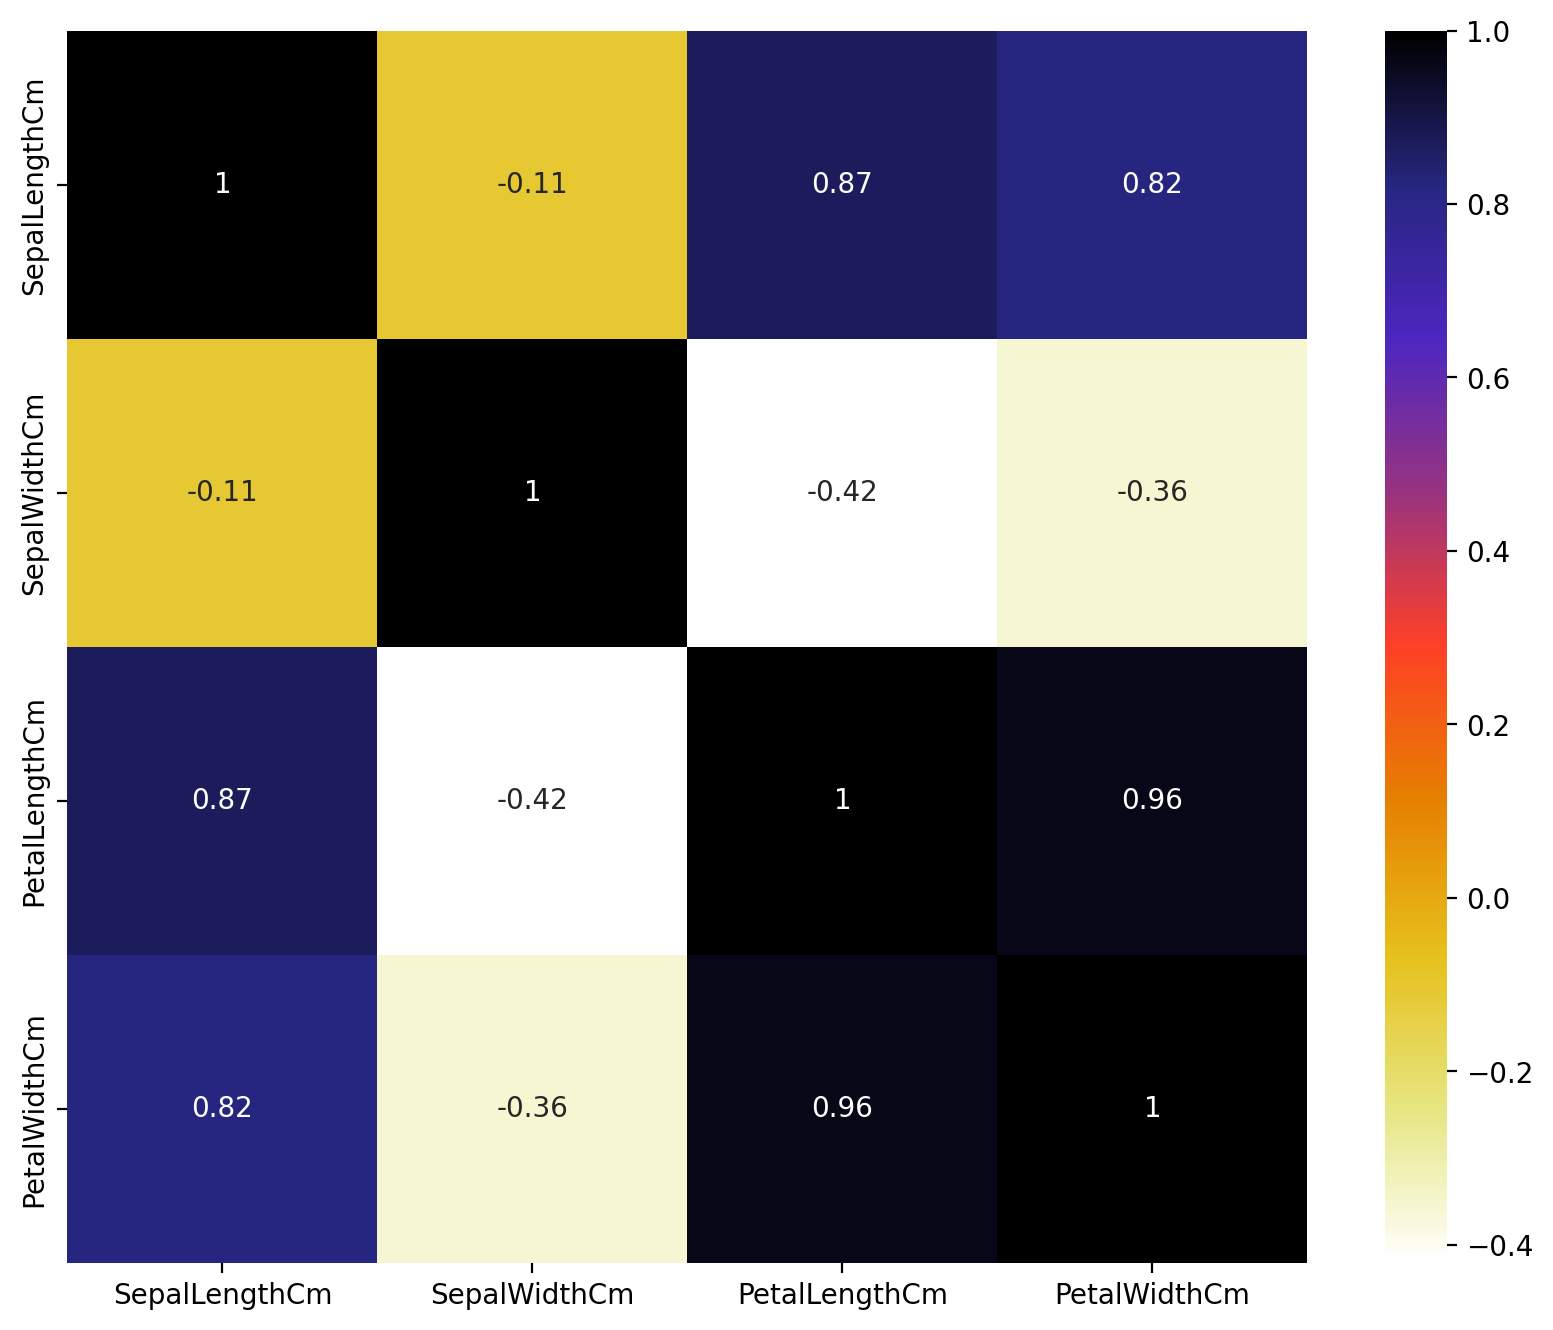

In [9]:
pl.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=pal)
pl.show()

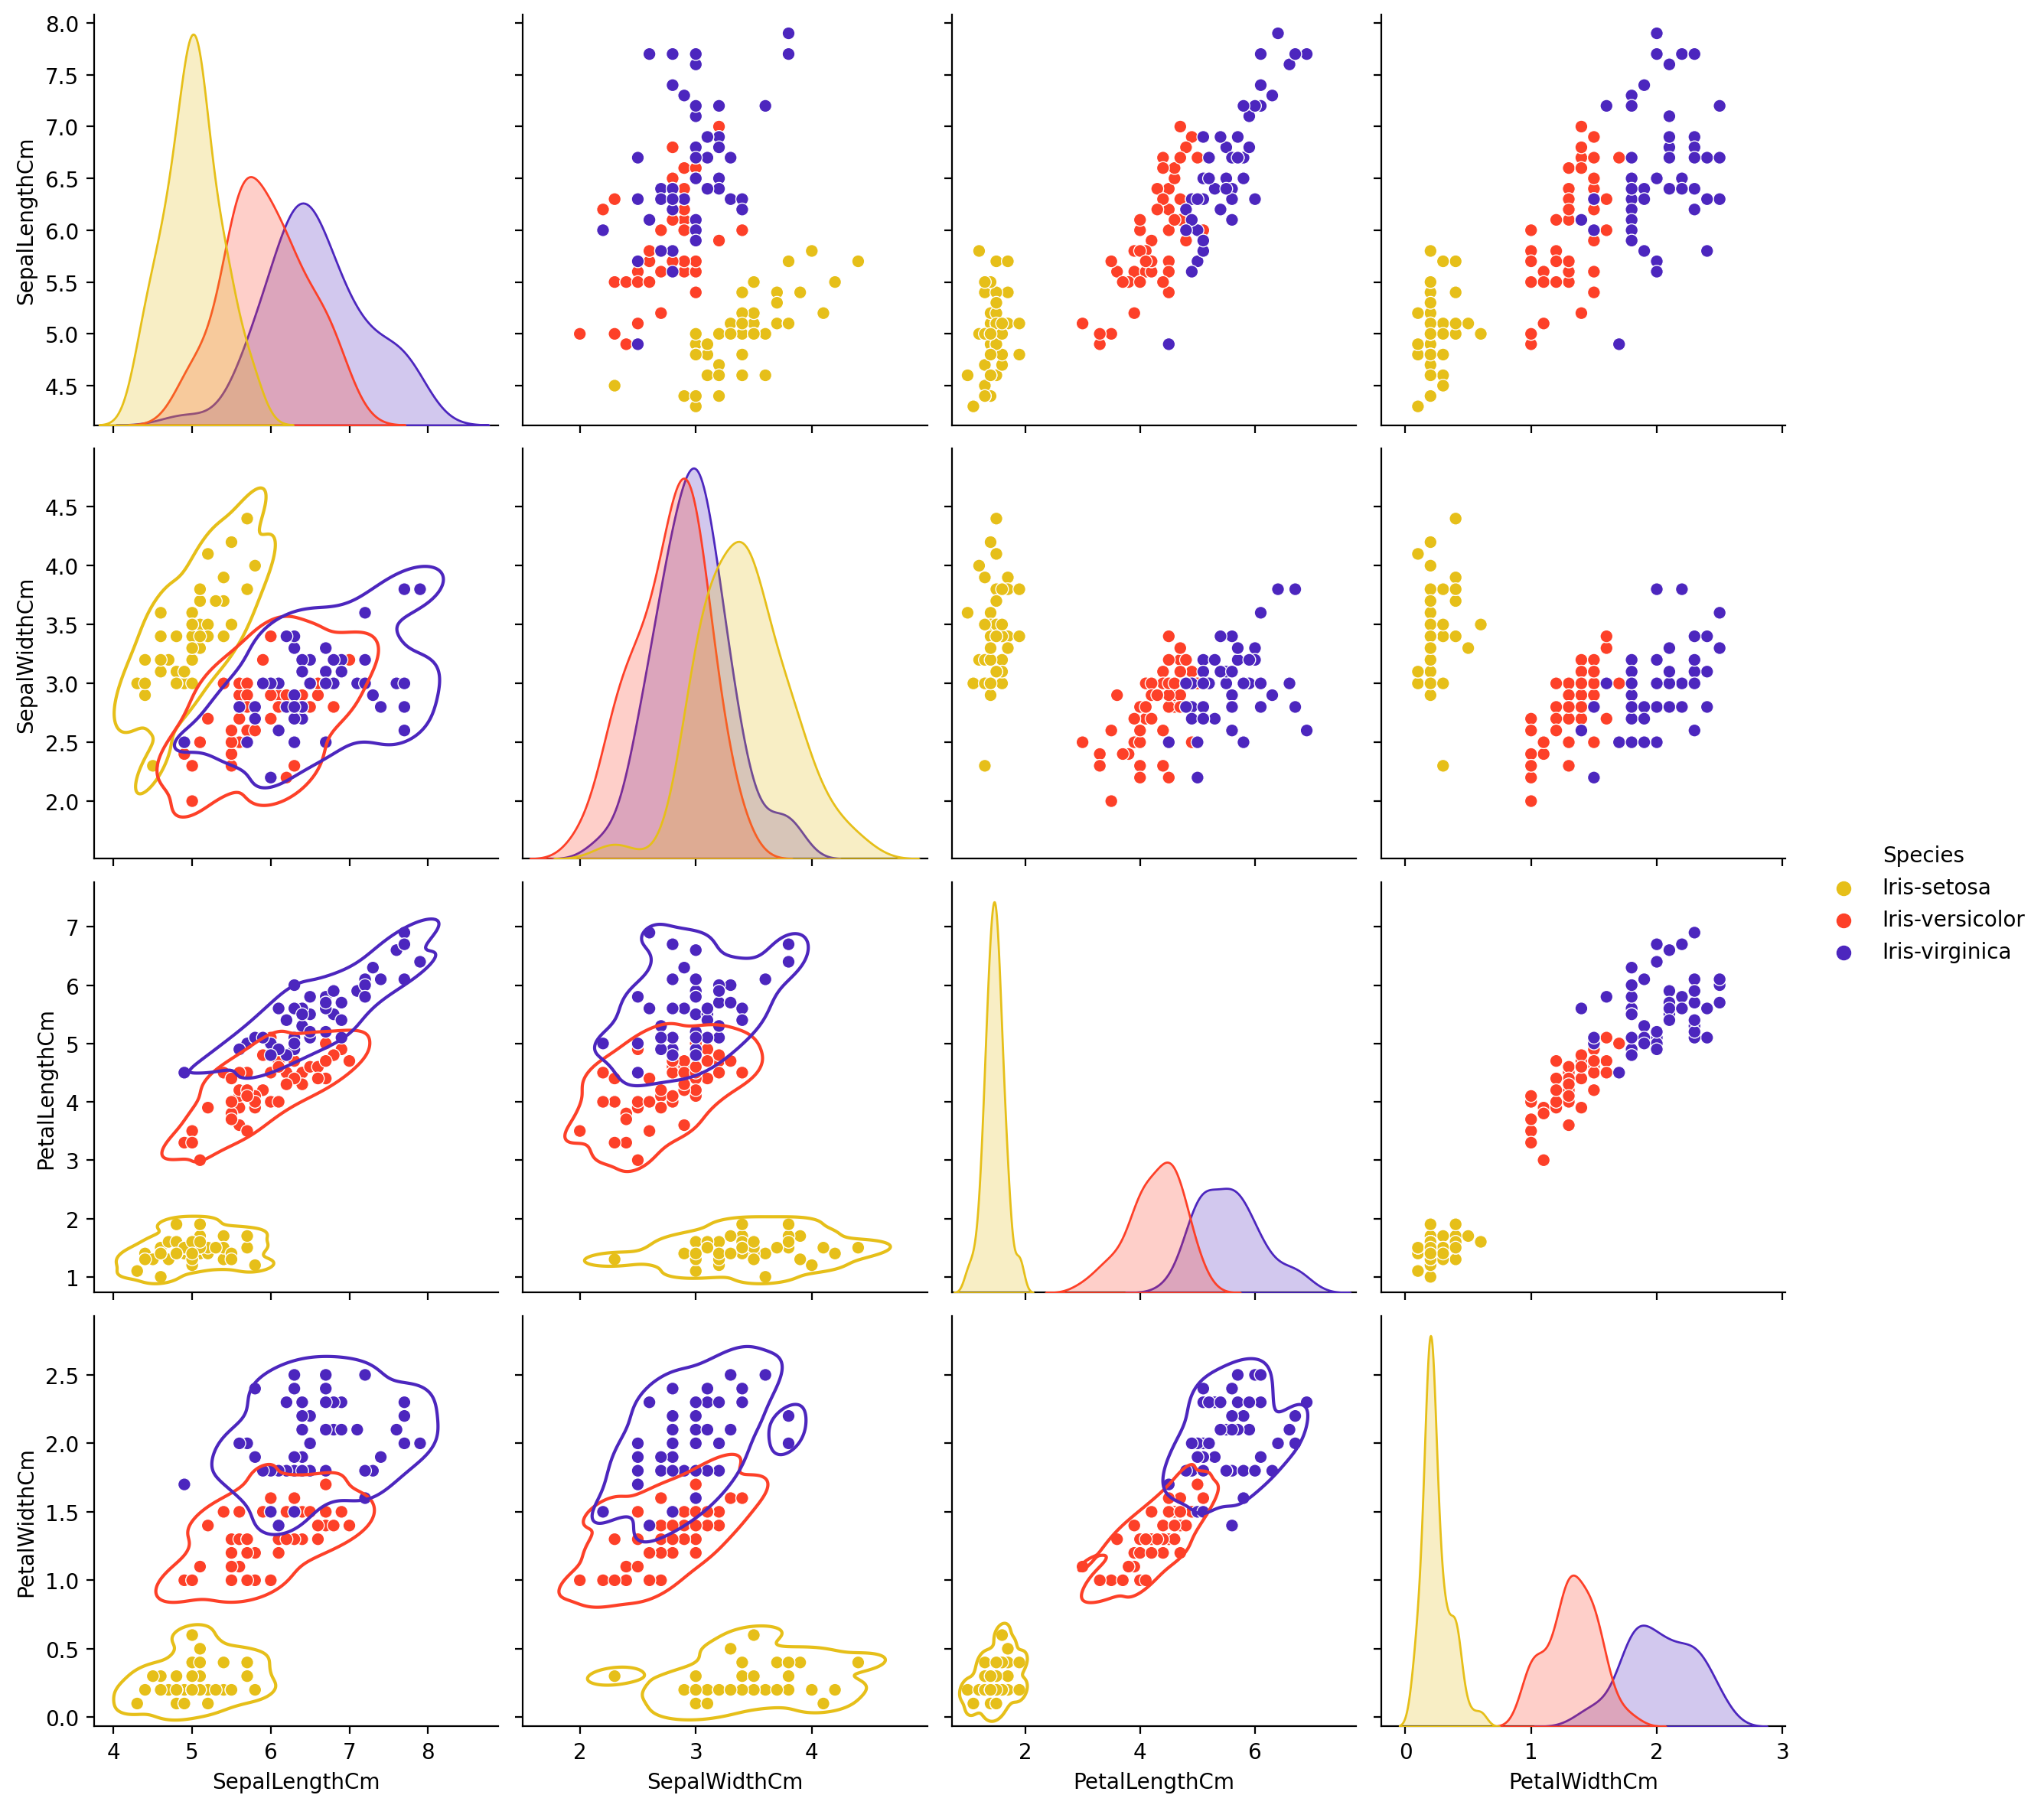

In [11]:
sns.pairplot(df, hue='Species', palette=pal, height=3).map_lower(sns.kdeplot, levels=2)
pl.show()

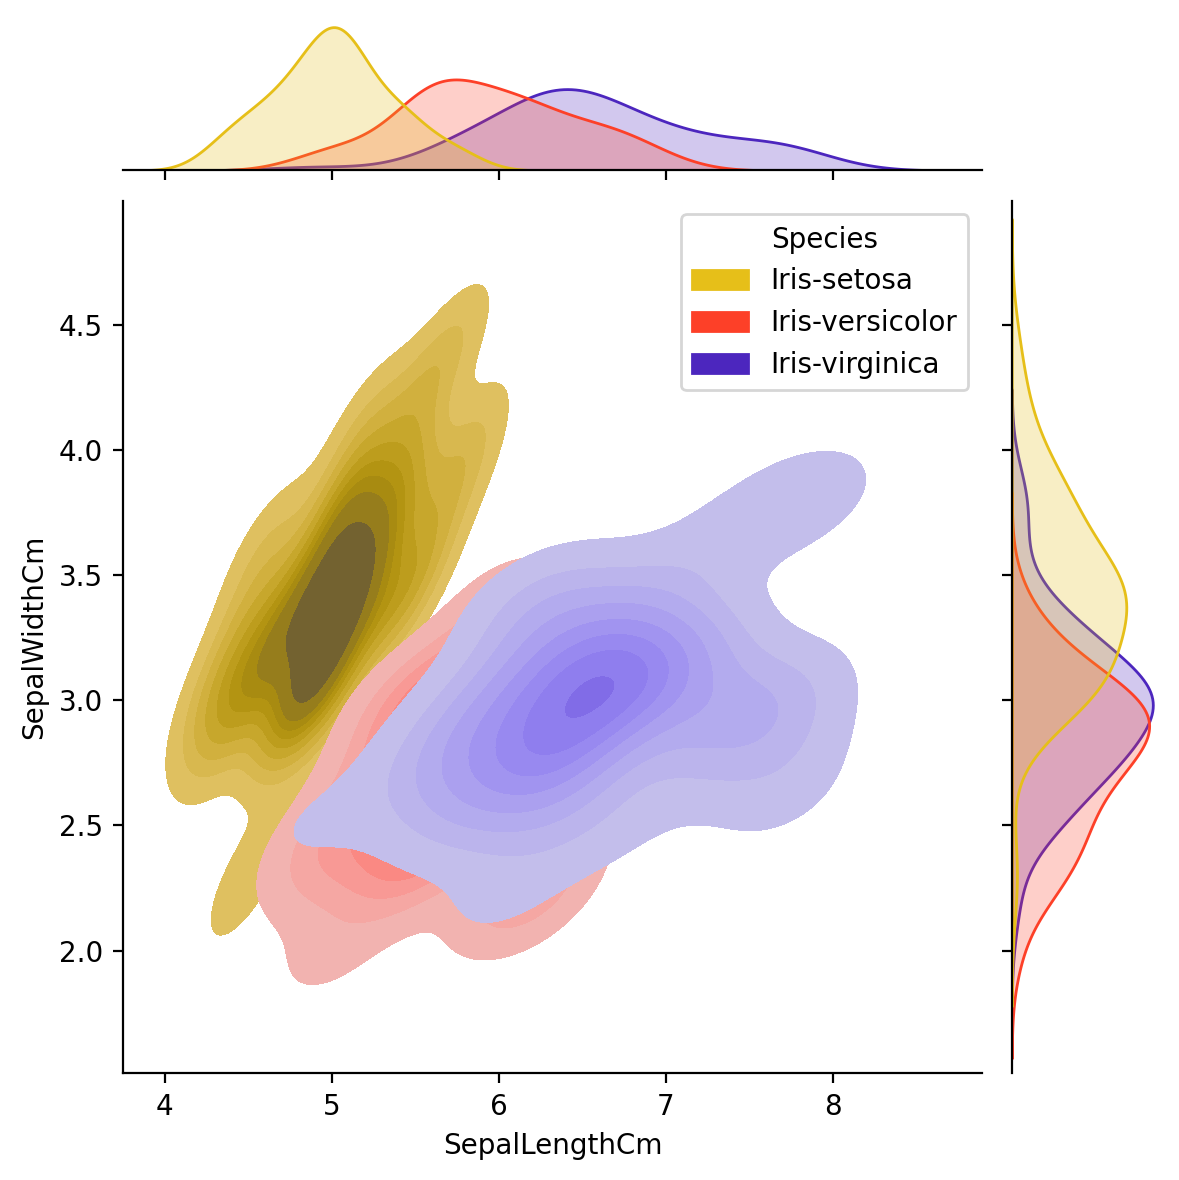

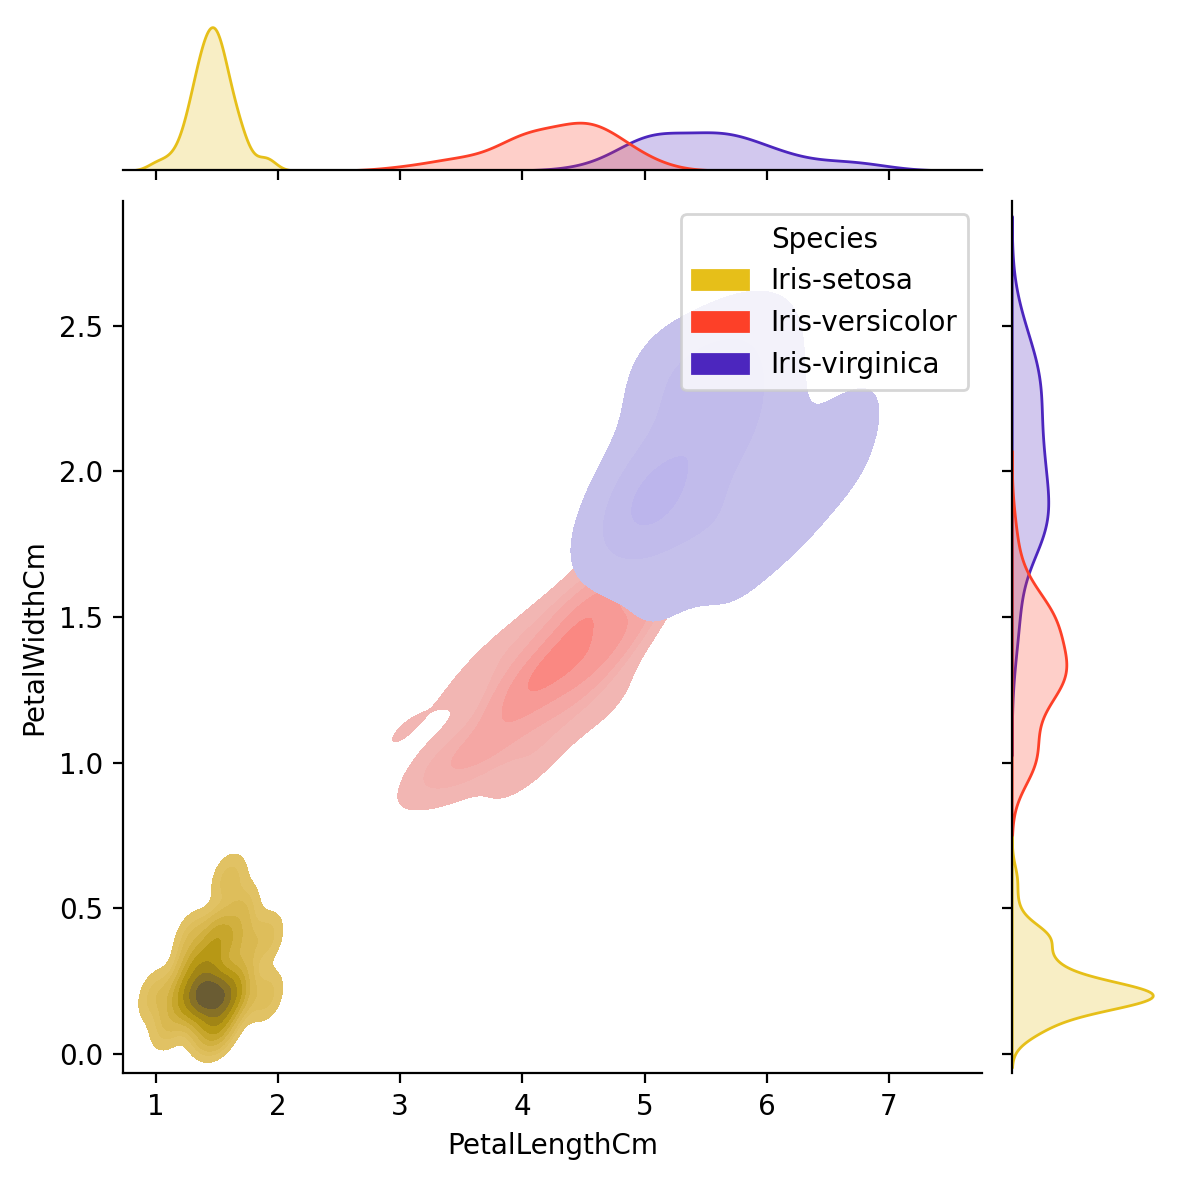

In [12]:
sns.jointplot(x='SepalLengthCm',
              y='SepalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

sns.jointplot(x='PetalLengthCm',
              y='PetalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

pl.show()

In [20]:

from dataprep.eda import create_report
create_report(df)


ModuleNotFoundError: No module named 'dataprep'

C:\Users\Adim\AppData\Local\Temp\ipykernel_664\198838864.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\Adim\AppData\Local\Temp\ipykernel_664\198838864.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\Adim\AppData\Local\Temp\ipykernel_664\198838864.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\Adim\AppData\Local\Temp\ipykernel_664\198838864.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)


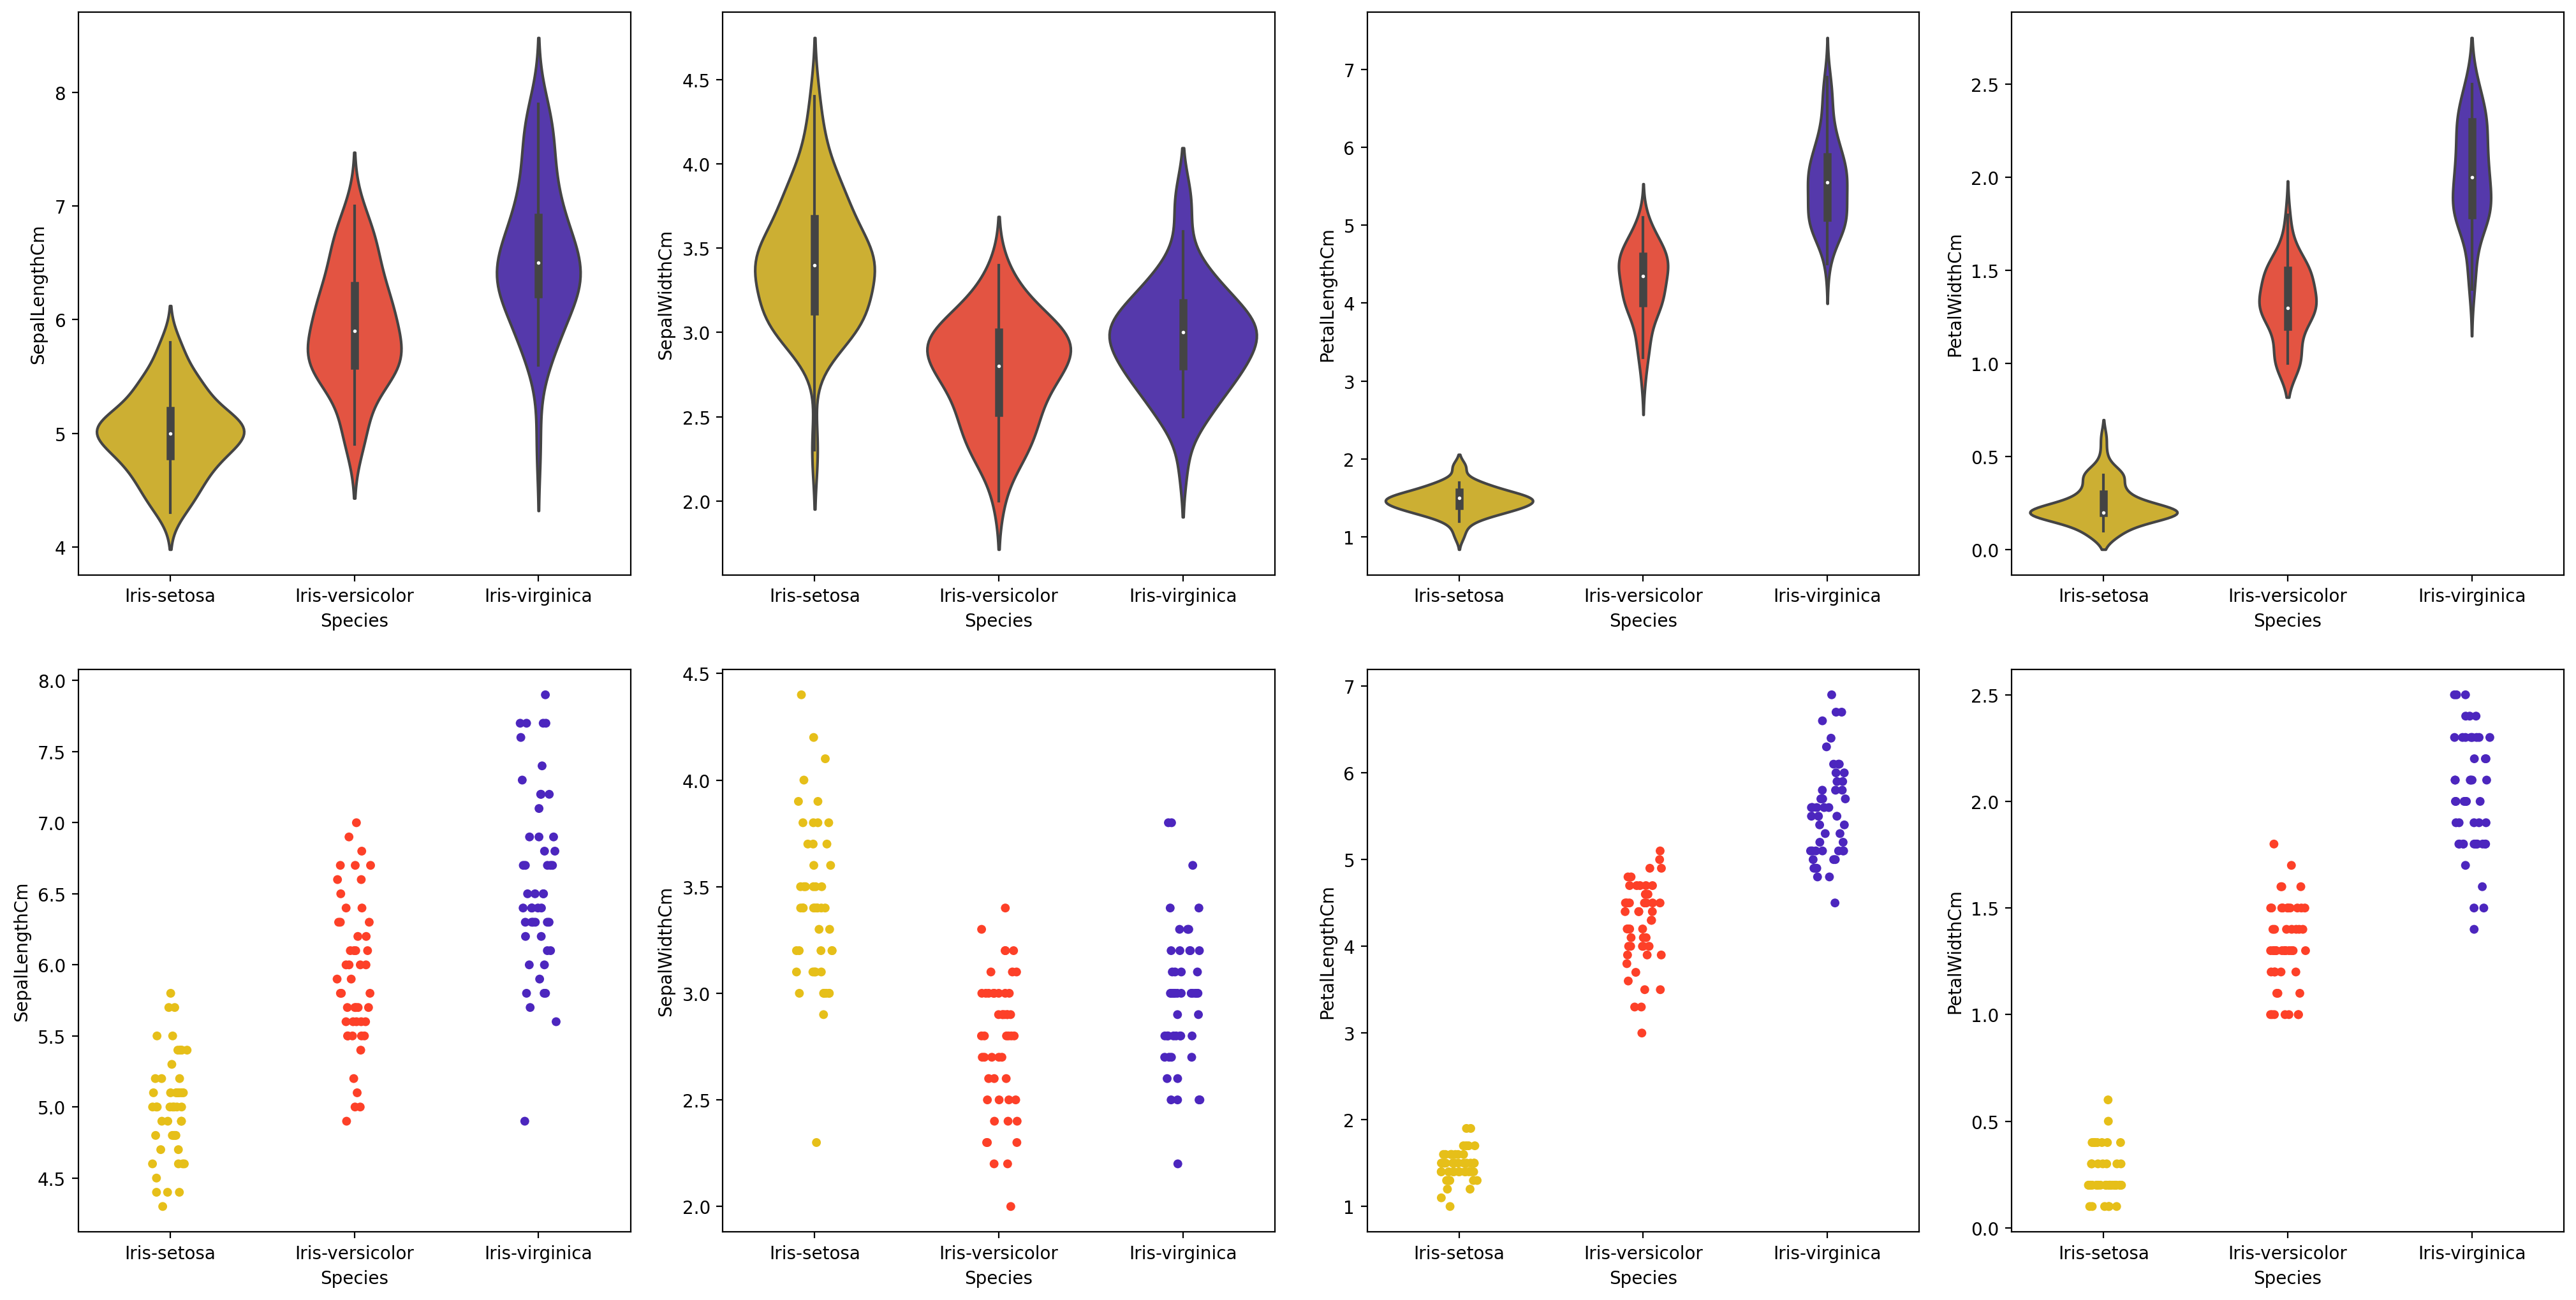

In [18]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Violin Plots
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
# Strip Plots
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
pl.tight_layout(pad=0, w_pad=1.5, h_pad=2)
pl.show()

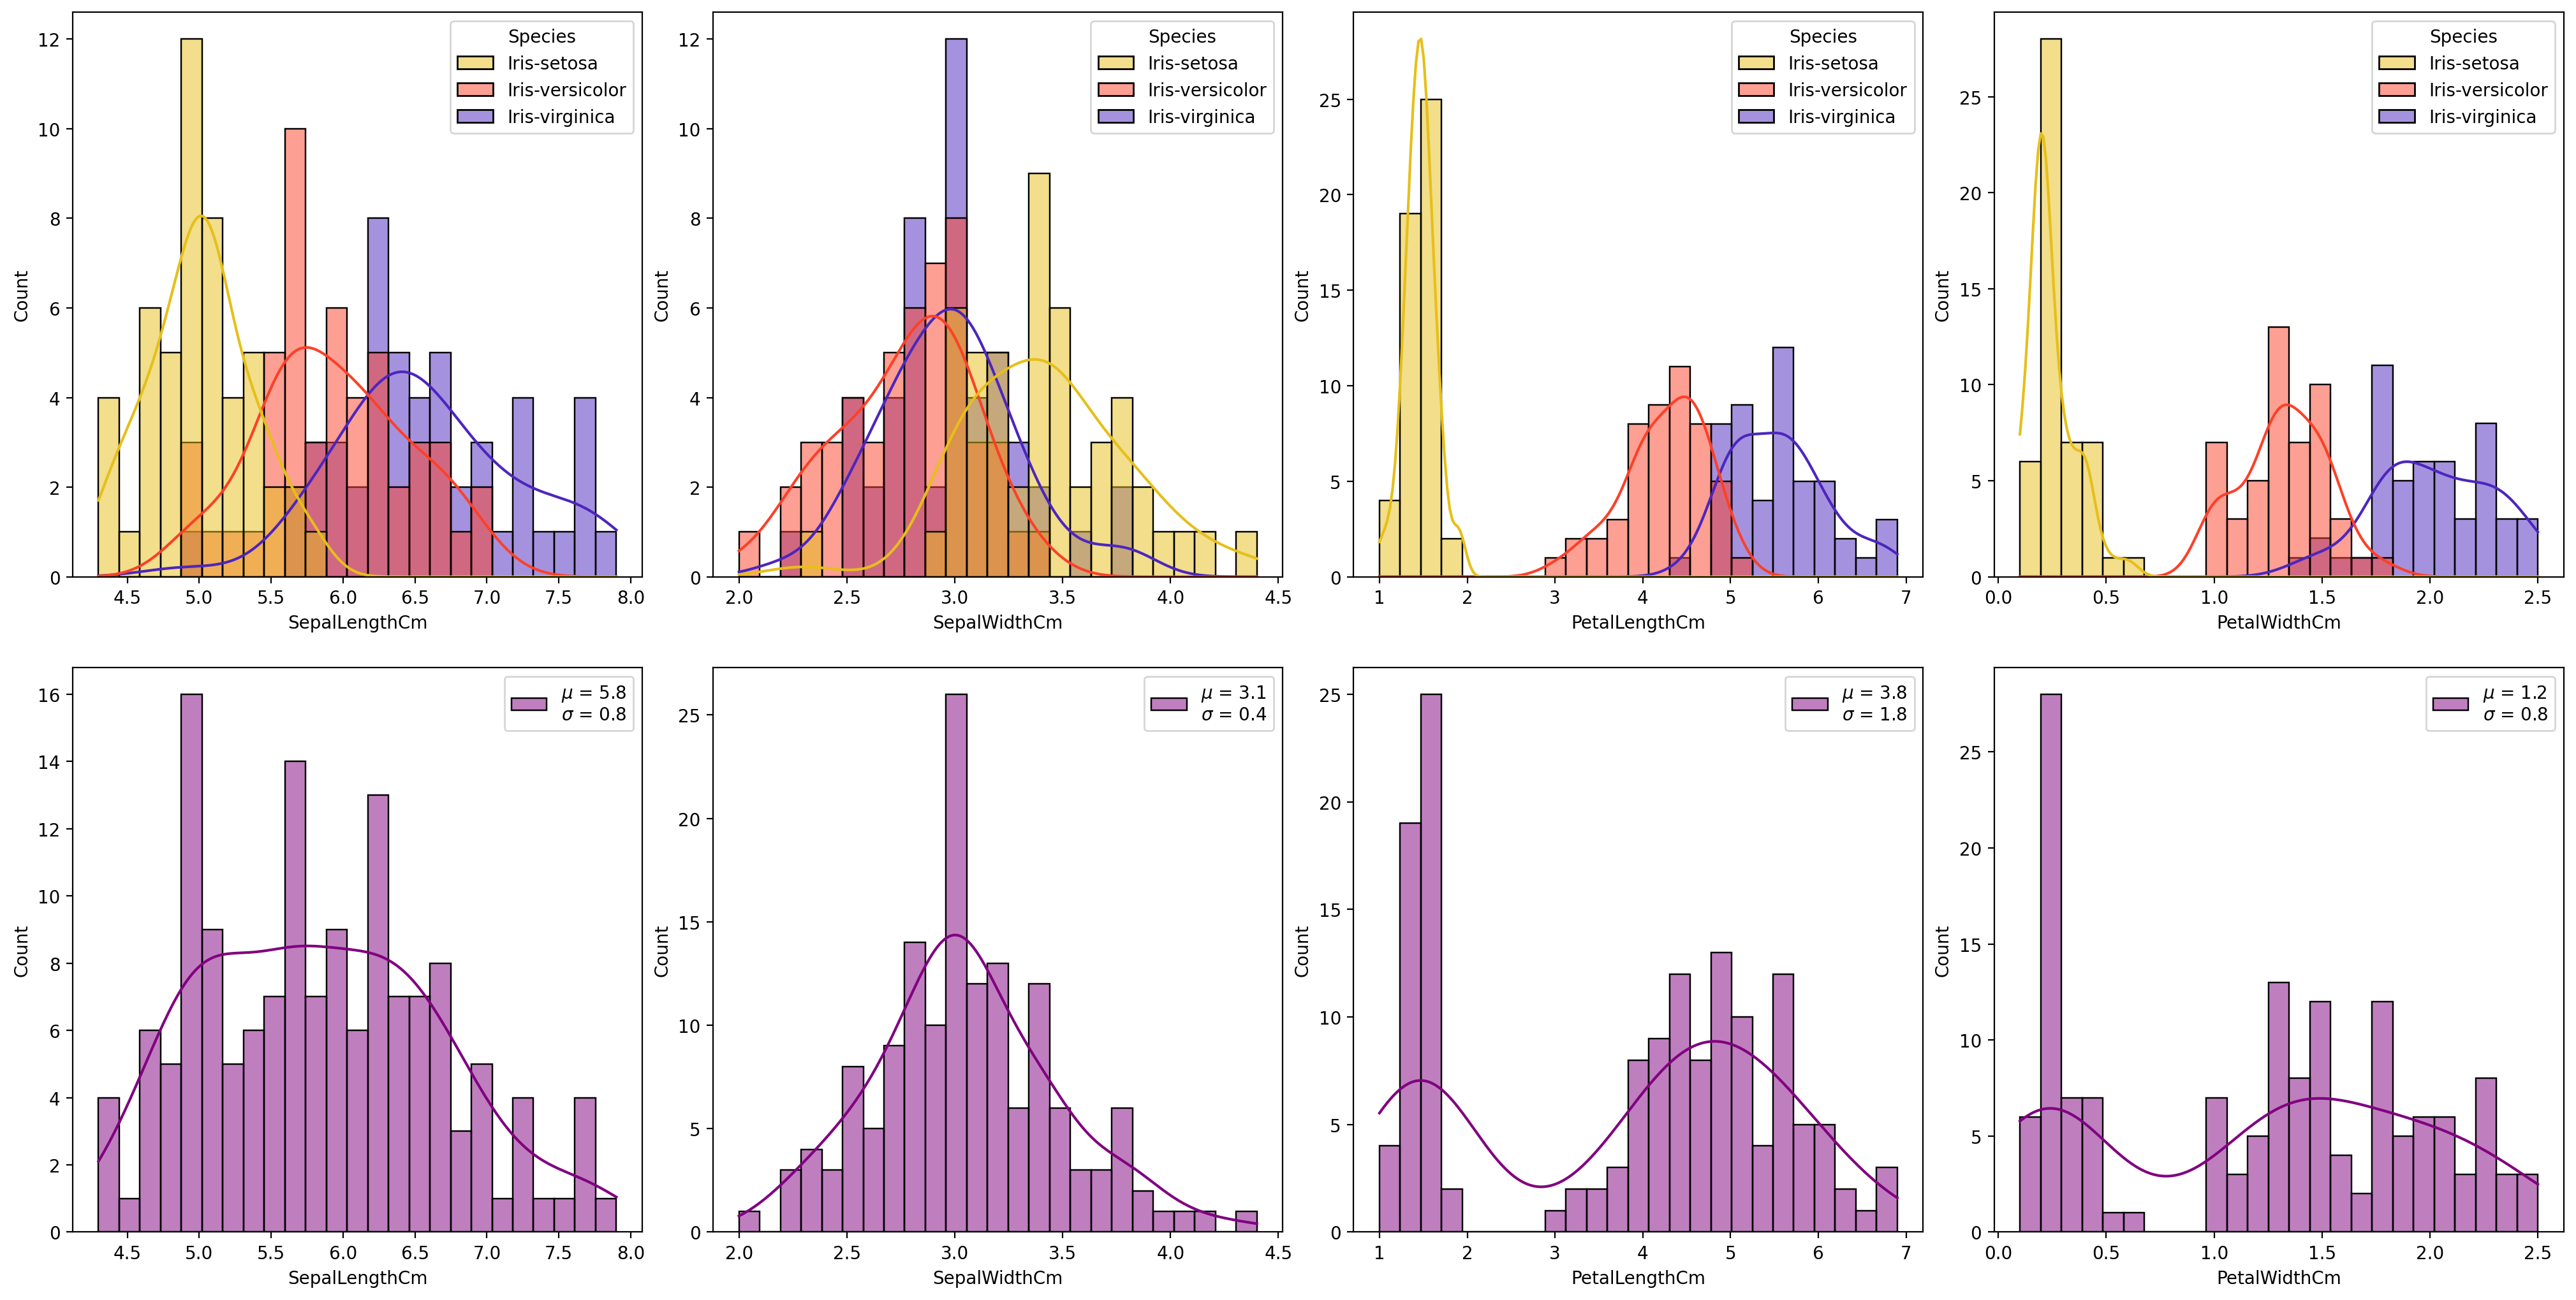

In [15]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='Species', palette=pal, ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()
    
pl.tight_layout(pad=0, w_pad=0, h_pad=2)
pl.show()

C:\ProgramData\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\ProgramData\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



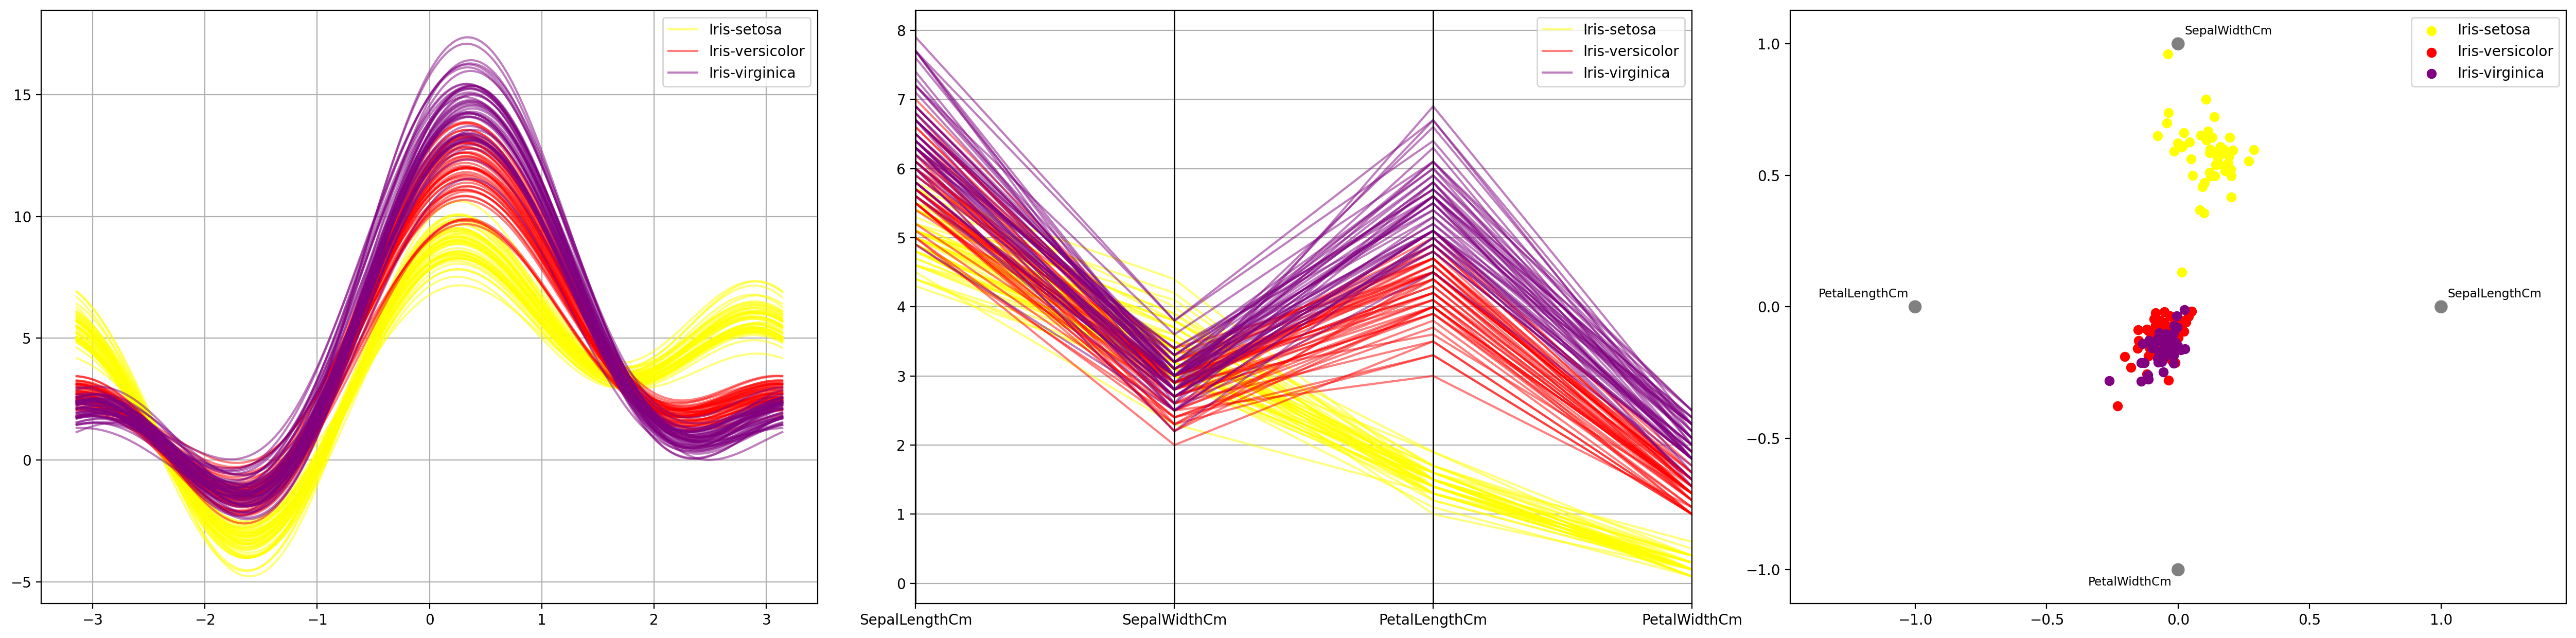

In [24]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d

scatter_matrix(df, dimensions=df.columns[:-1], color='Species',
               color_discrete_sequence=['yellow', 'red', 'purple'])
parallel_categories(df)
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalLengthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalWidthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import radviz
def AV_plots():
    """
    Special thanks to Anand Venkataraman
    """
    # Imports for plots
    from pandas.plotting import andrews_curves
    from pandas.plotting import parallel_coordinates
    from pandas.plotting import radviz

    # plotting
    fig, ax = pl.subplots(1, 3, figsize=(25,6))
    
    # Andrews Curves
    andrews_curves(frame=df, class_column="Species",
                   color=['yellow','red','purple'],
                   alpha=0.5, ax=ax[0])
    
    # Parallel Coordinates
    parallel_coordinates(frame=df, class_column="Species",
                         color=['yellow','red','purple'],
                         alpha=0.5, ax=ax[1])
    # Radviz
    radviz(frame=df, class_column="Species",
           
           color=['yellow','red','purple'], ax=ax[2])
    pl.tight_layout(pad=0, w_pad=0.2, h_pad=0)
    pl.show()
    
AV_plots()


In [25]:
from sklearn.model_selection import train_test_split # 4.1

from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.tree import DecisionTreeClassifier      # 4.3
from sklearn.neighbors import KNeighborsClassifier   # 4.4
from sklearn.naive_bayes import GaussianNB           # 4.5
from sklearn import svm                              # 4.6

# Model analysis functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

col_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ac_list = []
model_names = []

################################################
## Confusion Matrix Plot true vs pred values  ##
################################################
def CM(y_test, y_pred_test, col_names, model='model', fs=(8,6)):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    pl.rcParams.update({'font.size': 14})
    
    # Forming confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    pl.figure(figsize=fs)
    sns.heatmap(c_matrix, annot=True, annot_kws={'size':15},
                fmt=".0f", cmap=pl.cm.Purples, linewidths=5)
    
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title(f'Confusion Matrix for {model} Model')
    pl.show()
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=50)

print(f'Shapes | X - Train: {X_train.shape}\t | X - Test {X_test.shape}')
print(f'Shapes | Y - Train: {y_train.shape}\t | Y - Test {y_test.shape}')

Shapes | X - Train: (105, 4)	 | X - Test (45, 4)
Shapes | Y - Train: (105,)	 | Y - Test (45,)


In [26]:
display(X_train.head(),
        X_test.head())

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
17             5.1           3.5            1.4           0.3
42             4.4           3.2            1.3           0.2
18             5.7           3.8            1.7           0.3
146            6.3           2.5            5.0           1.9
114            5.8           2.8            5.1           2.4

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
88             5.6           3.0            4.1           1.3
72             6.3           2.5            4.9           1.5
20             5.4           3.4            1.7           0.2
16             5.4           3.9            1.3           0.4
147            6.5           3.0            5.2           2.0

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)
display(pd.DataFrame(X_train_ss).head(),
        pd.DataFrame(X_test_ss).head())

0         1         2         3
0 -0.894769  0.980450 -1.326228 -1.166693
1 -1.764684  0.280129 -1.383511 -1.298985
2 -0.149128  1.680772 -1.154381 -1.166693
3  0.596513 -1.353955  0.735945  0.949985
4 -0.024855 -0.653634  0.793227  1.611447

0         1         2         3
0 -0.273402 -0.186752  0.220402  0.156231
1  0.596513 -1.353955  0.678662  0.420816
2 -0.521949  0.747010 -1.154381 -1.298985
3 -0.521949  1.914213 -1.383511 -1.034401
4  0.845060 -0.186752  0.850510  1.082278

In [28]:
 print(f'{y_train.head()}\n\
      \n{y_test.head()}')

17        Iris-setosa
42        Iris-setosa
18        Iris-setosa
146    Iris-virginica
114    Iris-virginica
Name: Species, dtype: object
     
88     Iris-versicolor
72     Iris-versicolor
20         Iris-setosa
16         Iris-setosa
147     Iris-virginica
Name: Species, dtype: object


In [29]:
pd.DataFrame( y_test.value_counts() )

Species
Iris-versicolor       17
Iris-setosa           14
Iris-virginica        14

In [30]:
MR = LogisticRegression(multi_class='multinomial', random_state=0)

# Fitting Model
MR.fit(X_train, y_train)

# Getting Predictions
MR_pred = MR.predict(X_test)

# fitting model & getting predictions 
# MR.fit(X_train_ss, y_train)
# MR_pred = MR.predict(X_test_ss)
MR_ac = accuracy_score(y_test, MR_pred)
ac_list.append(MR_ac)
model_names.append('MLR')

print(f'Accuracy Score: {MR_ac:.3f}\n')

Accuracy Score: 0.978



In [31]:
MR_pred_df = pd.DataFrame(pd.Series(MR_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

Species  Test Outcome
Iris-versicolor       17            16
Iris-setosa           14            14
Iris-virginica        14            15

In [32]:
print(f'Intercept: \n {MR.intercept_}\n')
print(f'Coefficients: \n {MR.coef_}')

Intercept: 
 [  9.56770293   1.79401954 -11.36172247]

Coefficients: 
 [[-0.49530359  0.82561916 -2.25609857 -0.91242545]
 [ 0.5080803  -0.32624174 -0.16167594 -0.89204702]
 [-0.0127767  -0.49937743  2.41777451  1.80447248]]


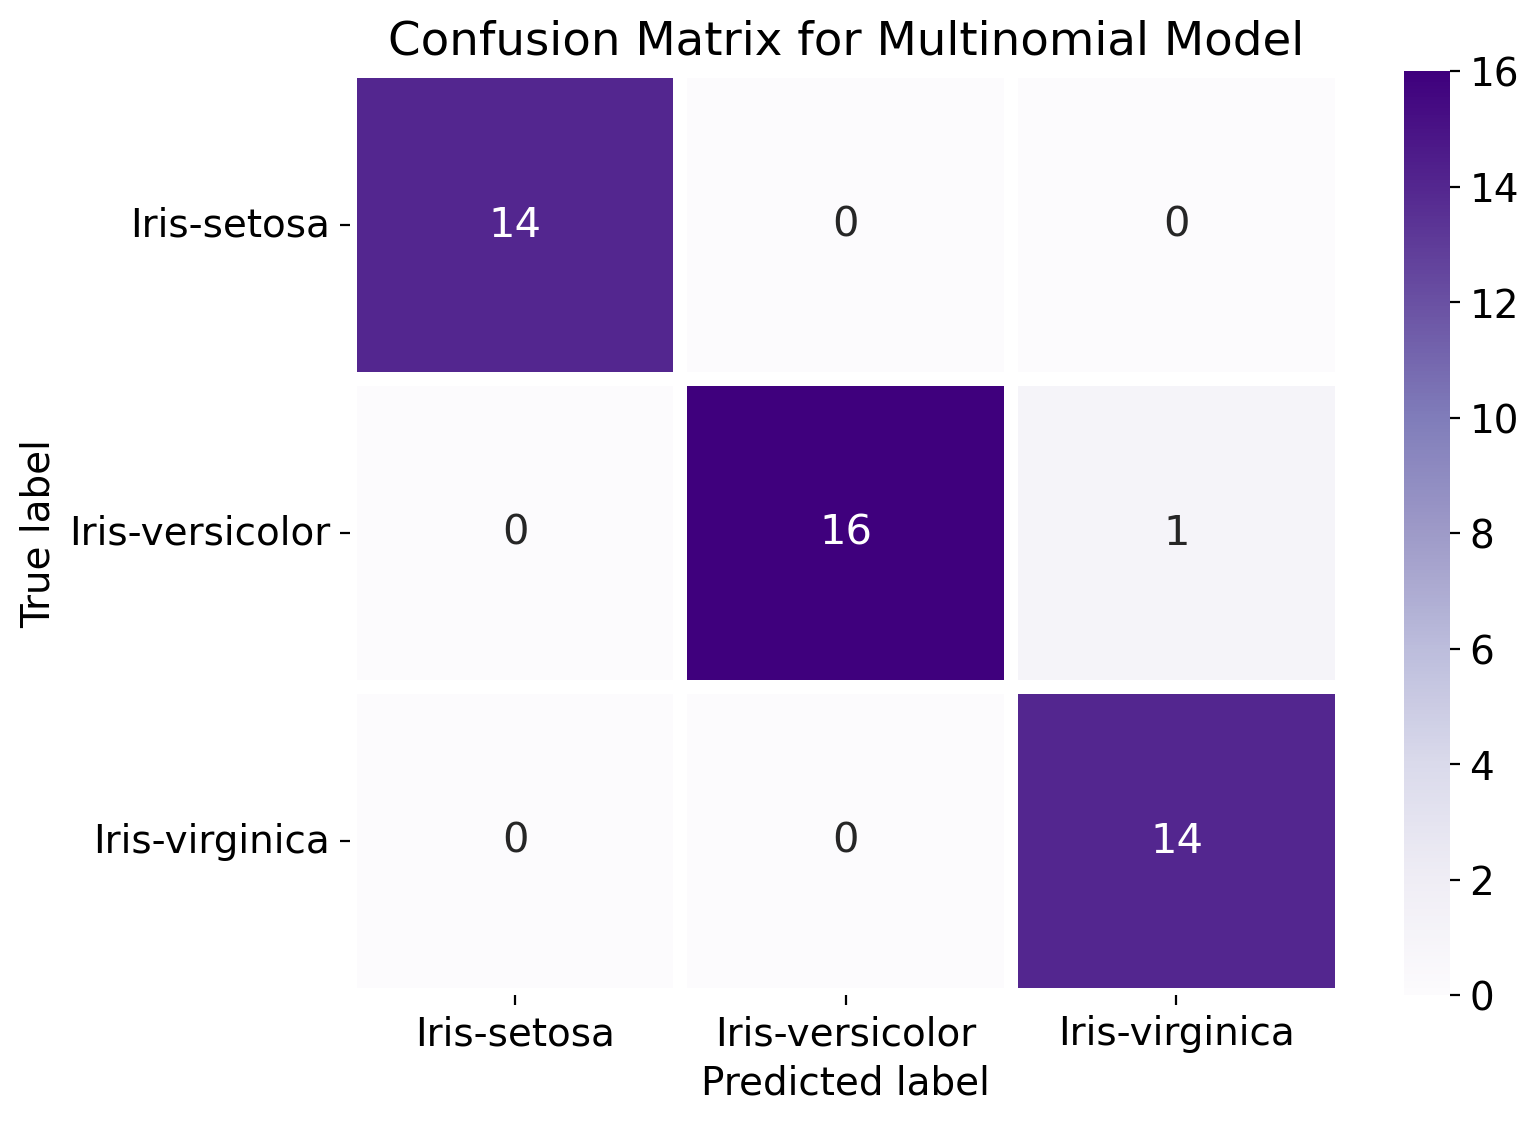

In [33]:
CM(y_test, MR_pred, col_names=col_names, model='Multinomial')

In [34]:
print(classification_report(y_test, MR_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
DT = DecisionTreeClassifier()

# Fitting Model
DT.fit(X_train, y_train)

# Getting Predictions
DT_pred = DT.predict(X_test)
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

print(f'Accuracy Score: {DT_ac:.3f}\n')

Accuracy Score: 0.956



In [36]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), DT_pred_df], axis=1)

Species  Test Outcome
Iris-versicolor       17            17
Iris-setosa           14            14
Iris-virginica        14            14

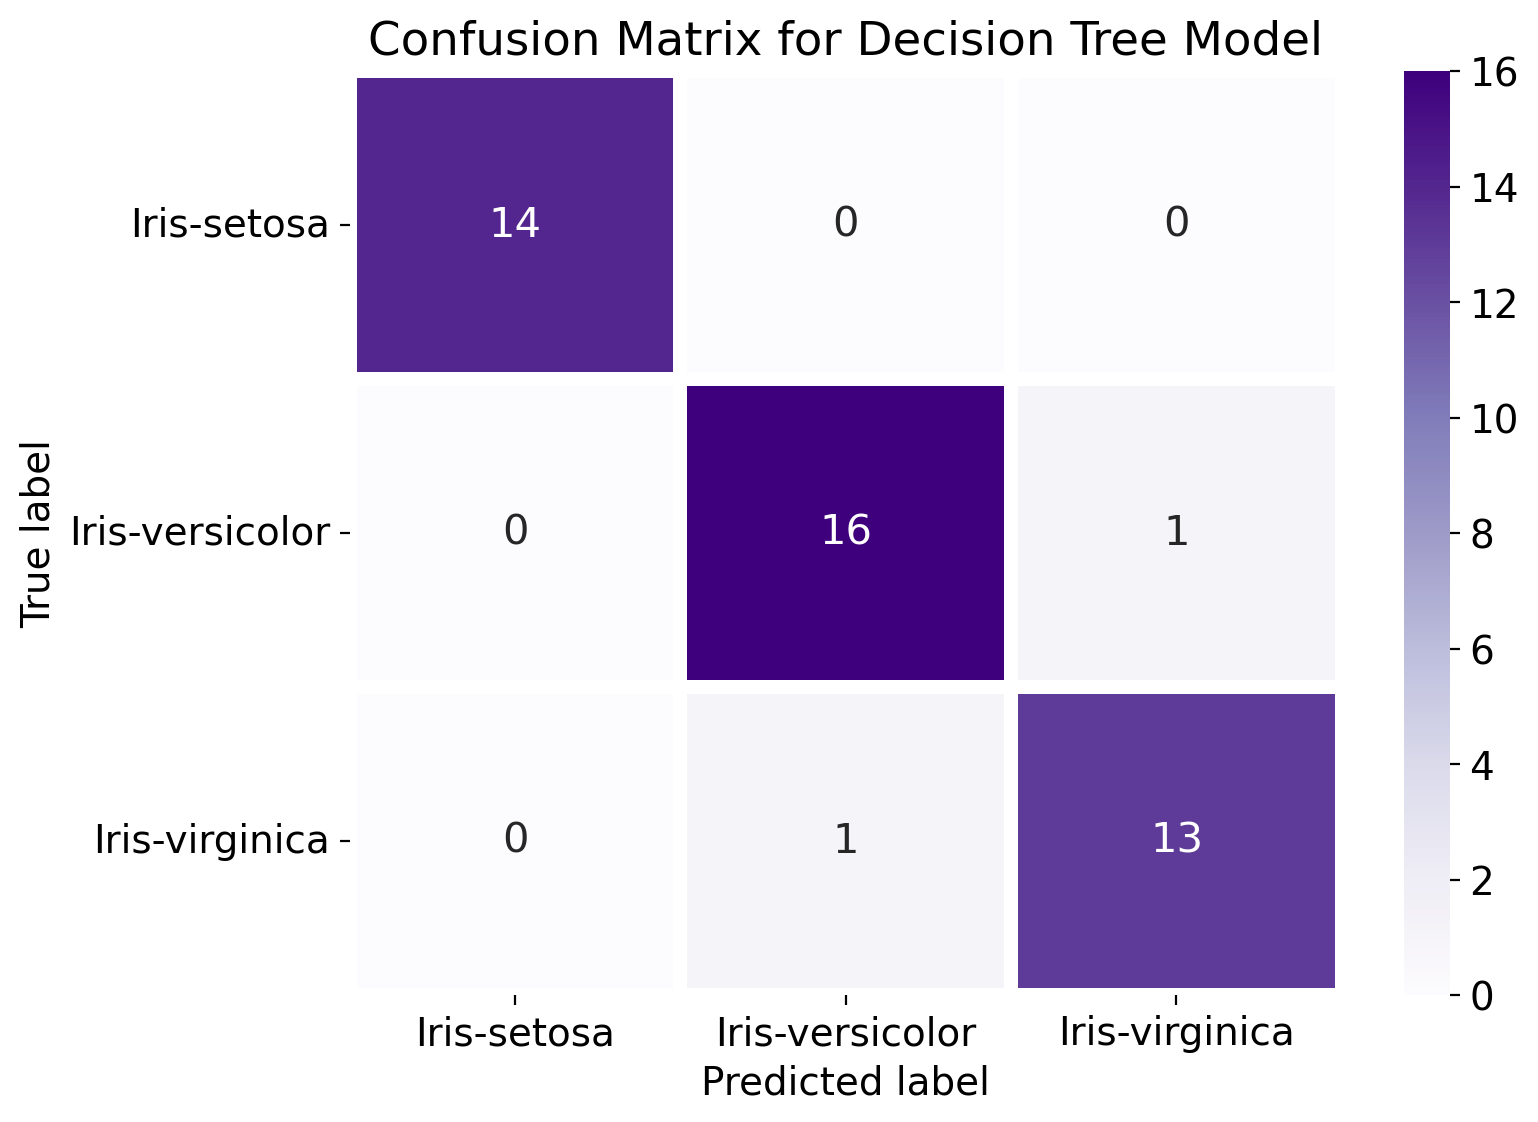

In [37]:
CM(y_test, DT_pred, col_names=col_names, model='Decision Tree')

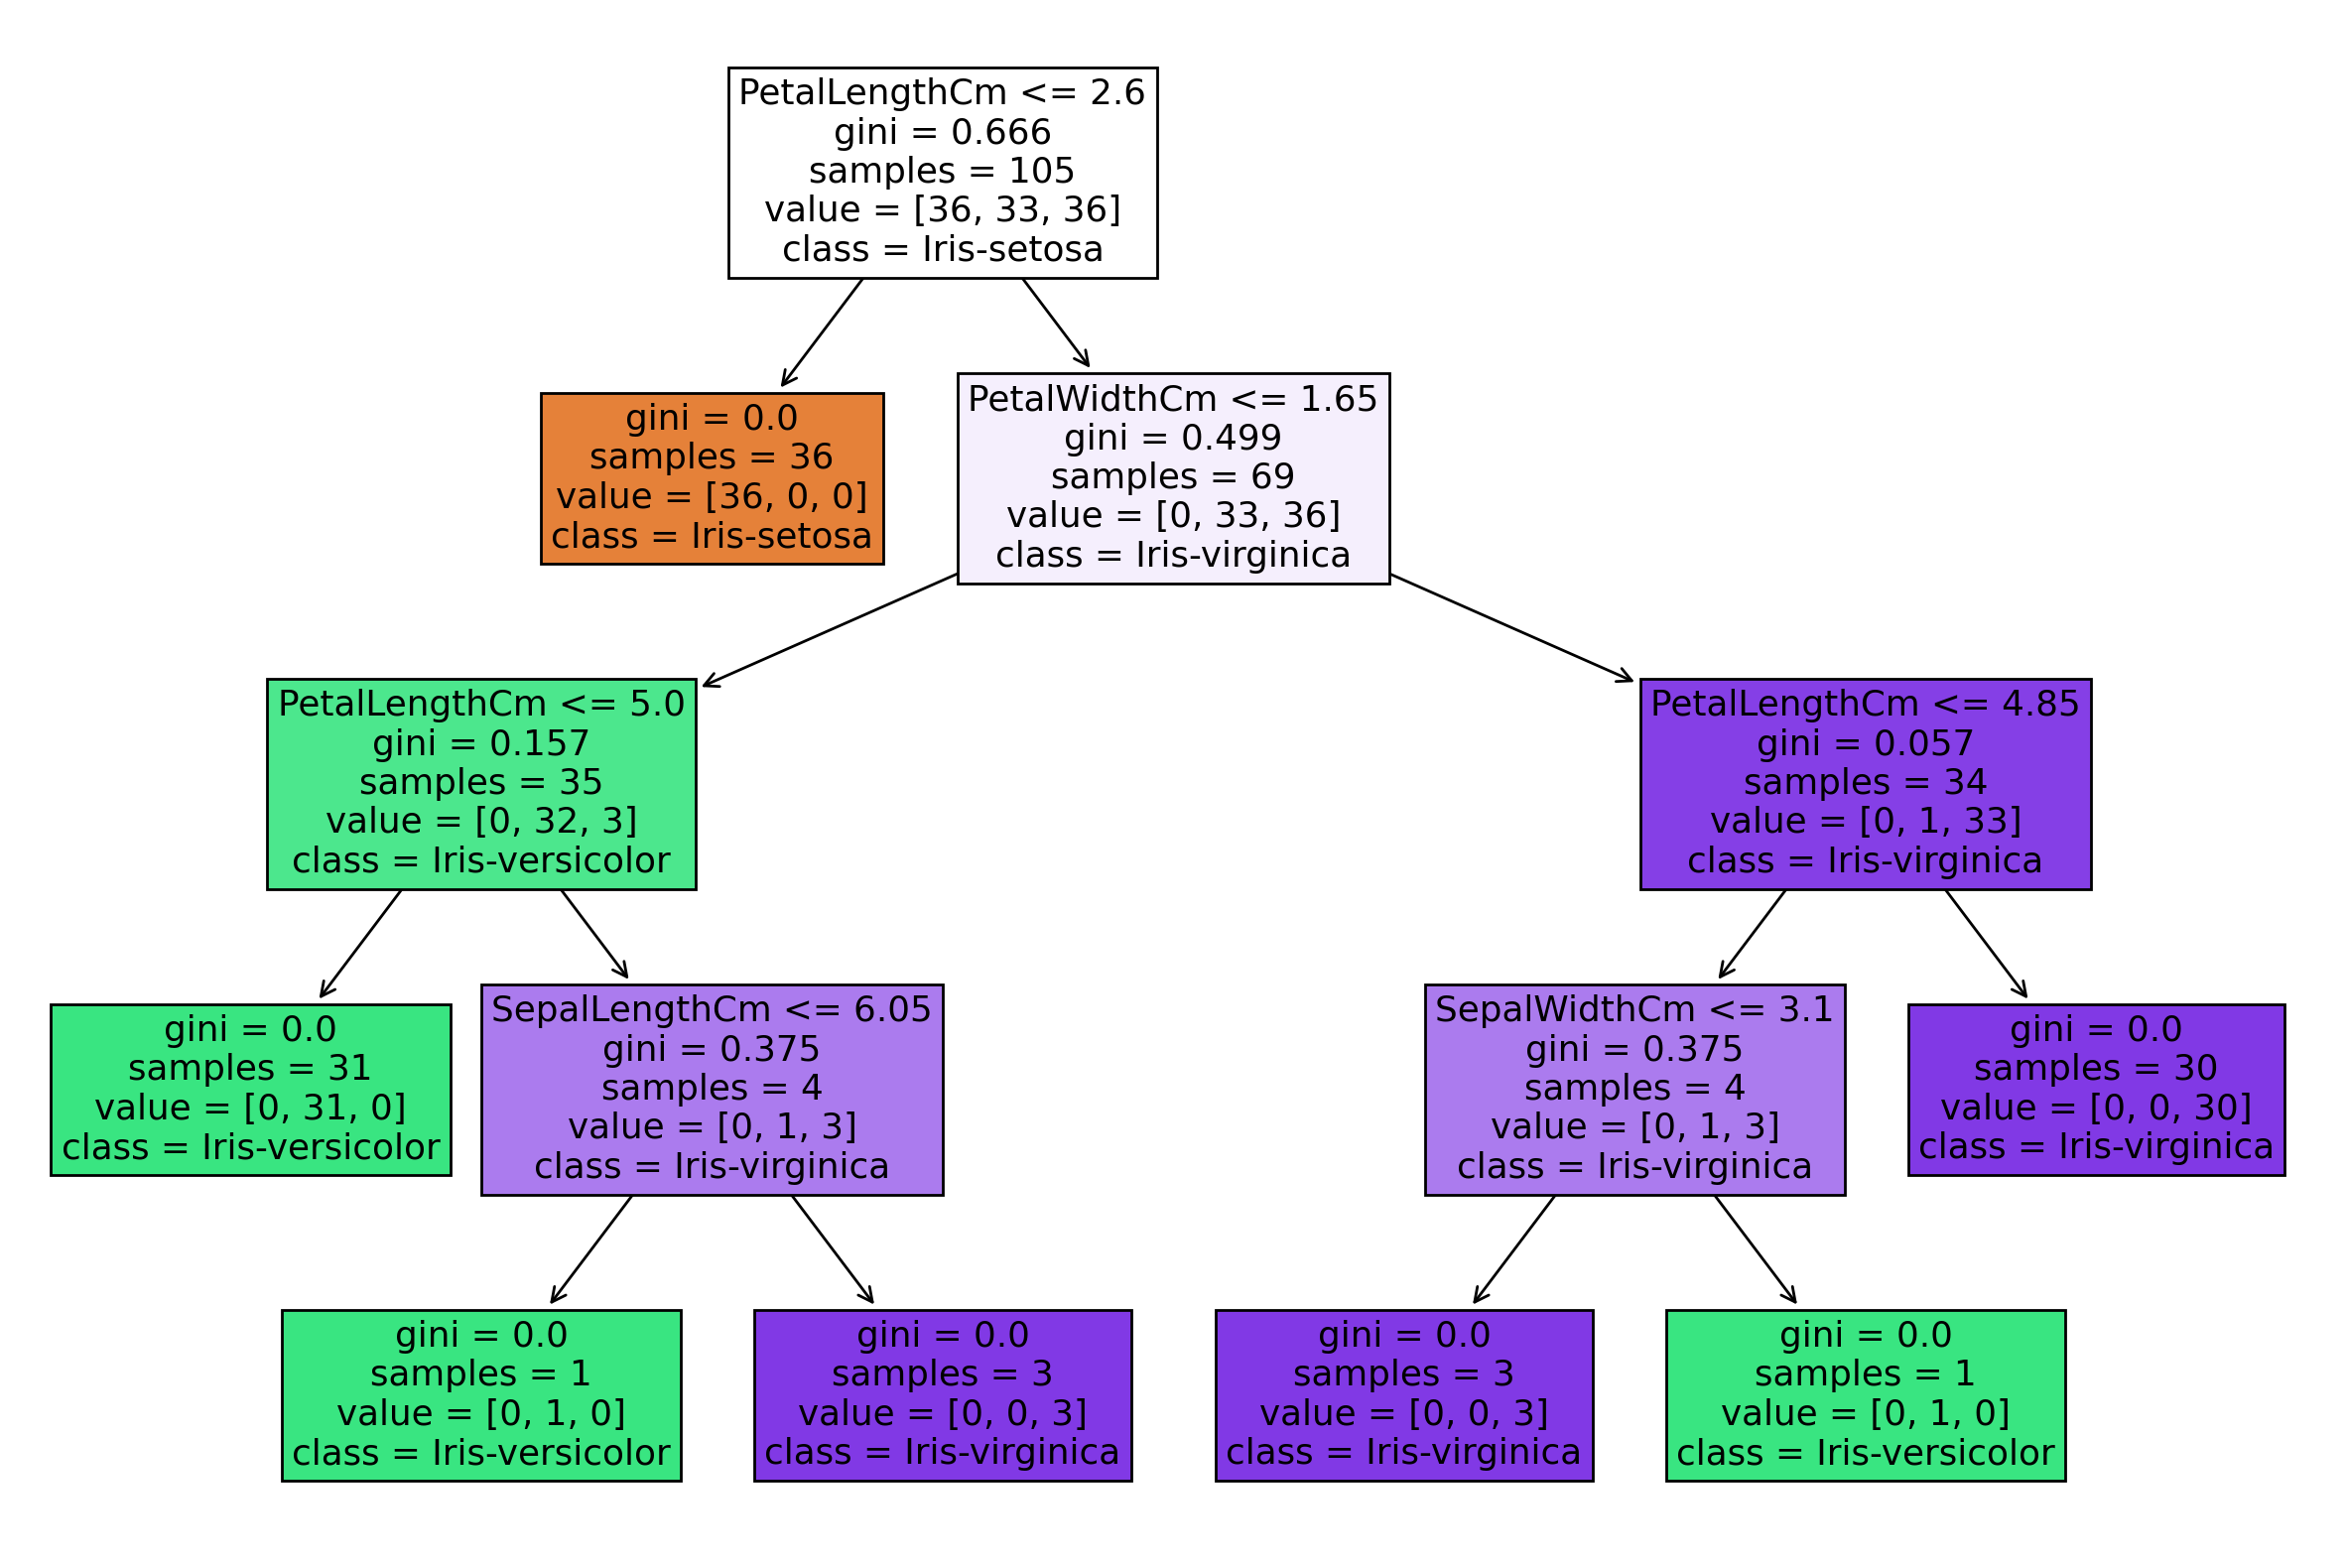

In [38]:
from sklearn import tree

pl.figure(figsize=(15,10))
tree.plot_tree(DT, feature_names=X.columns, class_names=col_names, filled=True)
pl.show()

In [39]:
print(classification_report(y_test, DT_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [53]:
def KNN_n_test(X_train, y_train, X_test, y_test, n_list, fs=(8,6)):
    
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    
    assert n_list[0] > 0, f'Please make sure n[0] = {n_list[0]} > 0.'

    # looping through different n values
    scores = [0]*len(n_list)
    
    for i, n in enumerate(n_list):
        KNN = KNeighborsClassifier(n_neighbors=n)
        
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
        
        scores[i] = accuracy_score(y_test, y_pred)

    pl.figure(figsize=fs)
    pl.plot(n_list, scores, color='k')
    pl.scatter(n_list, scores, color='C9')
    pl.xlabel('n values for KNN')
    pl.ylabel('Accuracy Score')
    pl.title('Accuracy Scores for K-Nearest Neighbors Vote Models')
    pl.grid(alpha=0.2)
    pl.show()
    KNN_n_test(X_train_ss, y_train, X_test_ss, y_test, n_list=range(1,50), fs=(7,5))

In [41]:
KNN = KNeighborsClassifier(n_neighbors=10)

# Fitting Model 
KNN.fit(X_train_ss, y_train)

# Getting Predictions
KNN_pred = KNN.predict(X_test_ss)
KNN_ac = accuracy_score(y_test, KNN_pred)
ac_list.append(KNN_ac)
model_names.append('KNN')

print(f'Accuracy Score: {KNN_ac:.3f}\n')

Accuracy Score: 0.956



In [42]:
KNN_pred_df = pd.DataFrame(pd.Series(KNN_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

Species  Test Outcome
Iris-versicolor       17            17
Iris-setosa           14            14
Iris-virginica        14            14

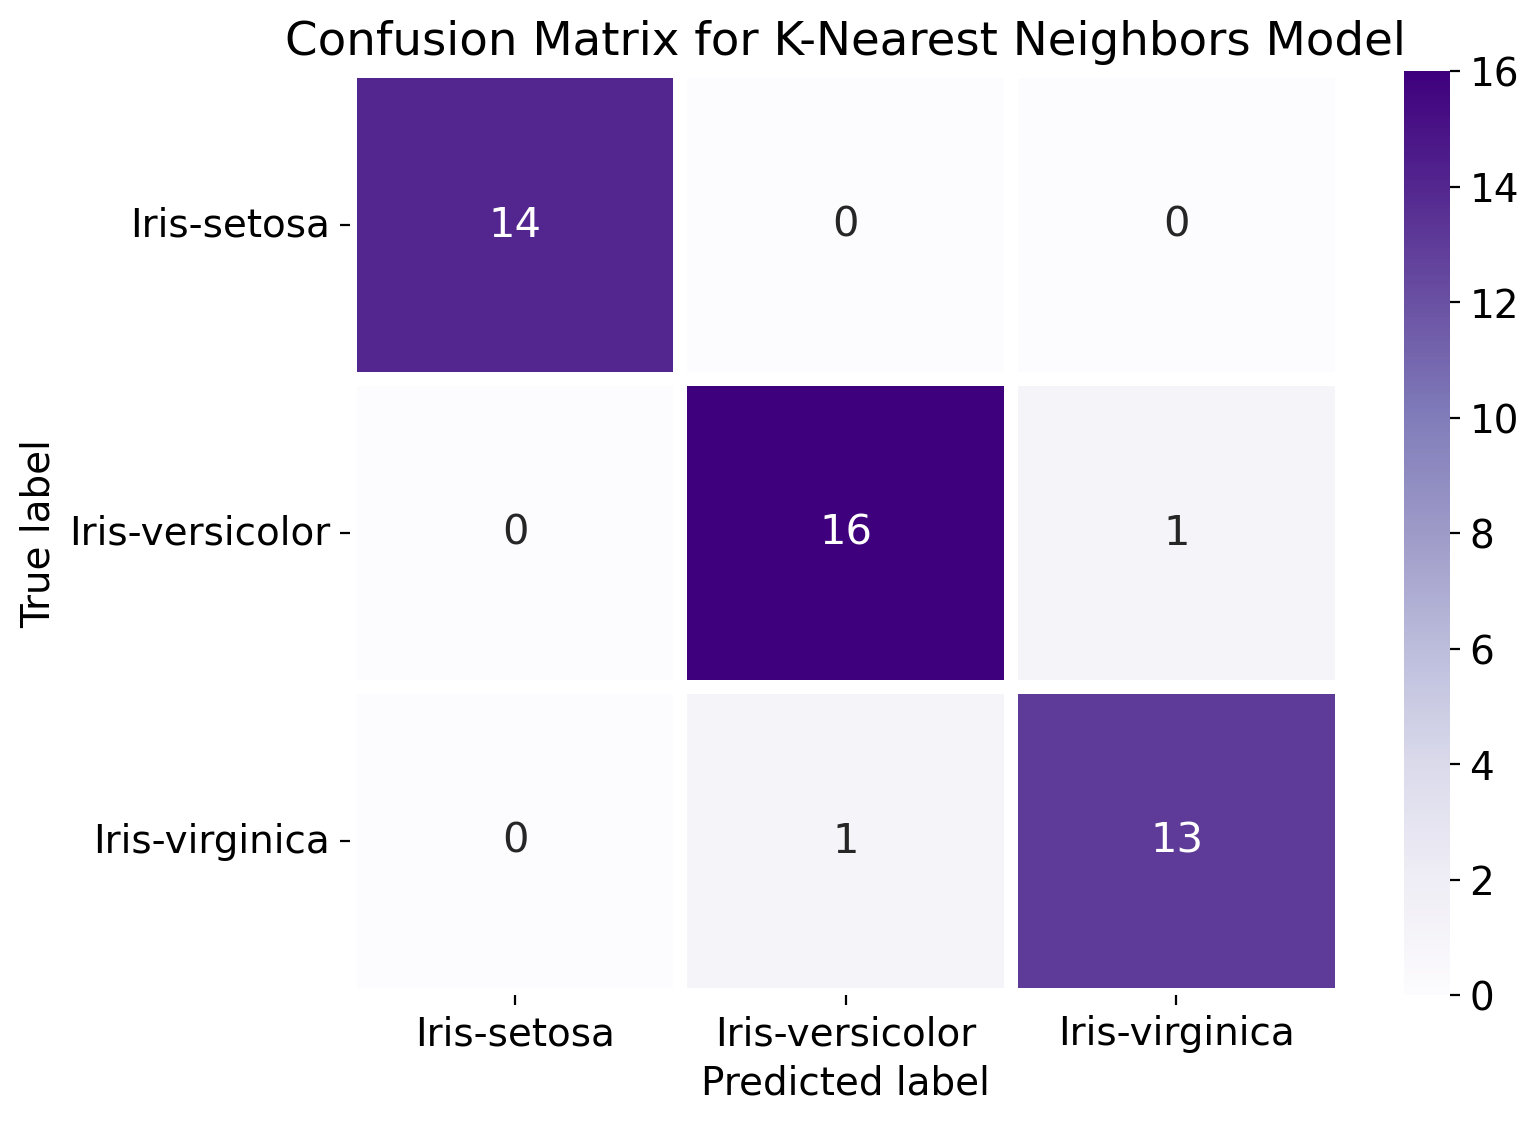

In [43]:
CM(y_test, KNN_pred, col_names=col_names, model='K-Nearest Neighbors')

In [44]:
print(classification_report(y_test, KNN_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [45]:
GN = GaussianNB()

# Fitting Model
GN.fit(X_train, y_train)

# Getting Predictions
GM_pred = GN.predict(X_test)
GM_ac = accuracy_score(y_test, GM_pred)
ac_list.append(GM_ac)
model_names.append('GM')

print(f'Accuracy Score: {GM_ac:.3f}\n')

Accuracy Score: 0.956



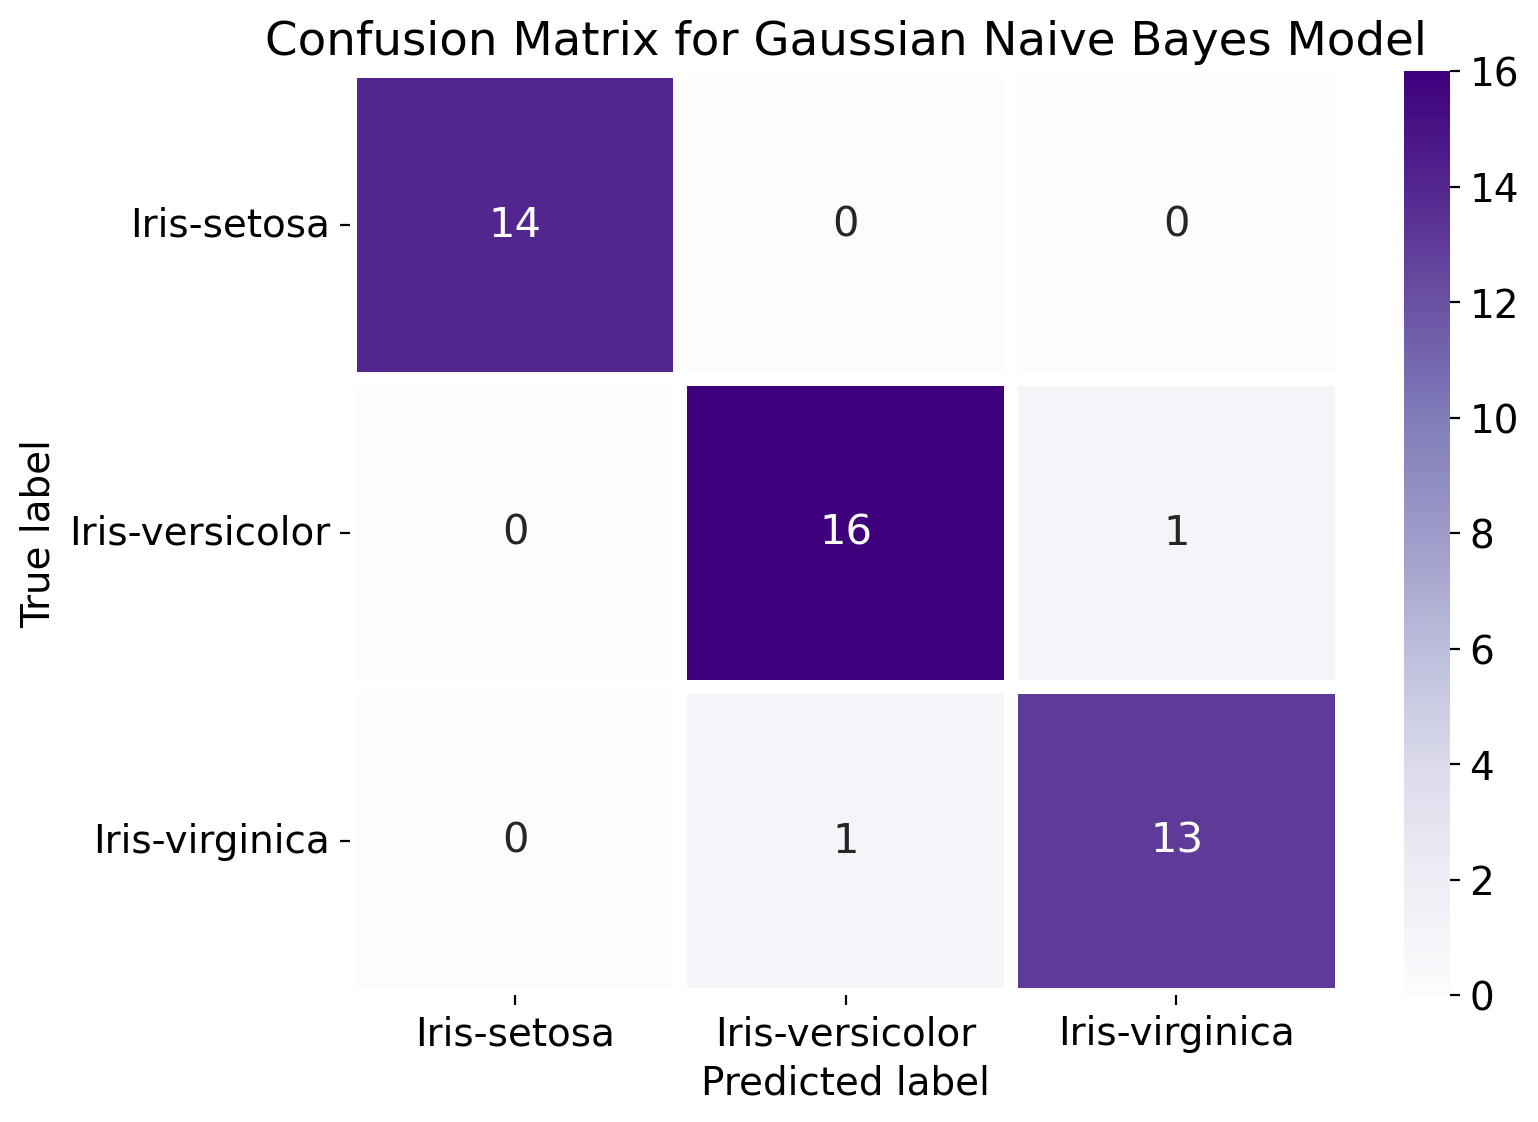

In [46]:
CM(y_test, GM_pred, col_names=col_names, model='Gaussian Naive Bayes')

In [47]:
print(classification_report(y_test, GM_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [48]:
SV = svm.SVC()

# Fitting Model
SV.fit(X_train, y_train)

# Getting Predictions 
SV_pred = SV.predict(X_test)
SV_ac = accuracy_score(y_test, SV_pred)
ac_list.append(SV_ac)
model_names.append('SVC')

print(f'Accuracy Score: {SV_ac:.3f}\n')

Accuracy Score: 0.956



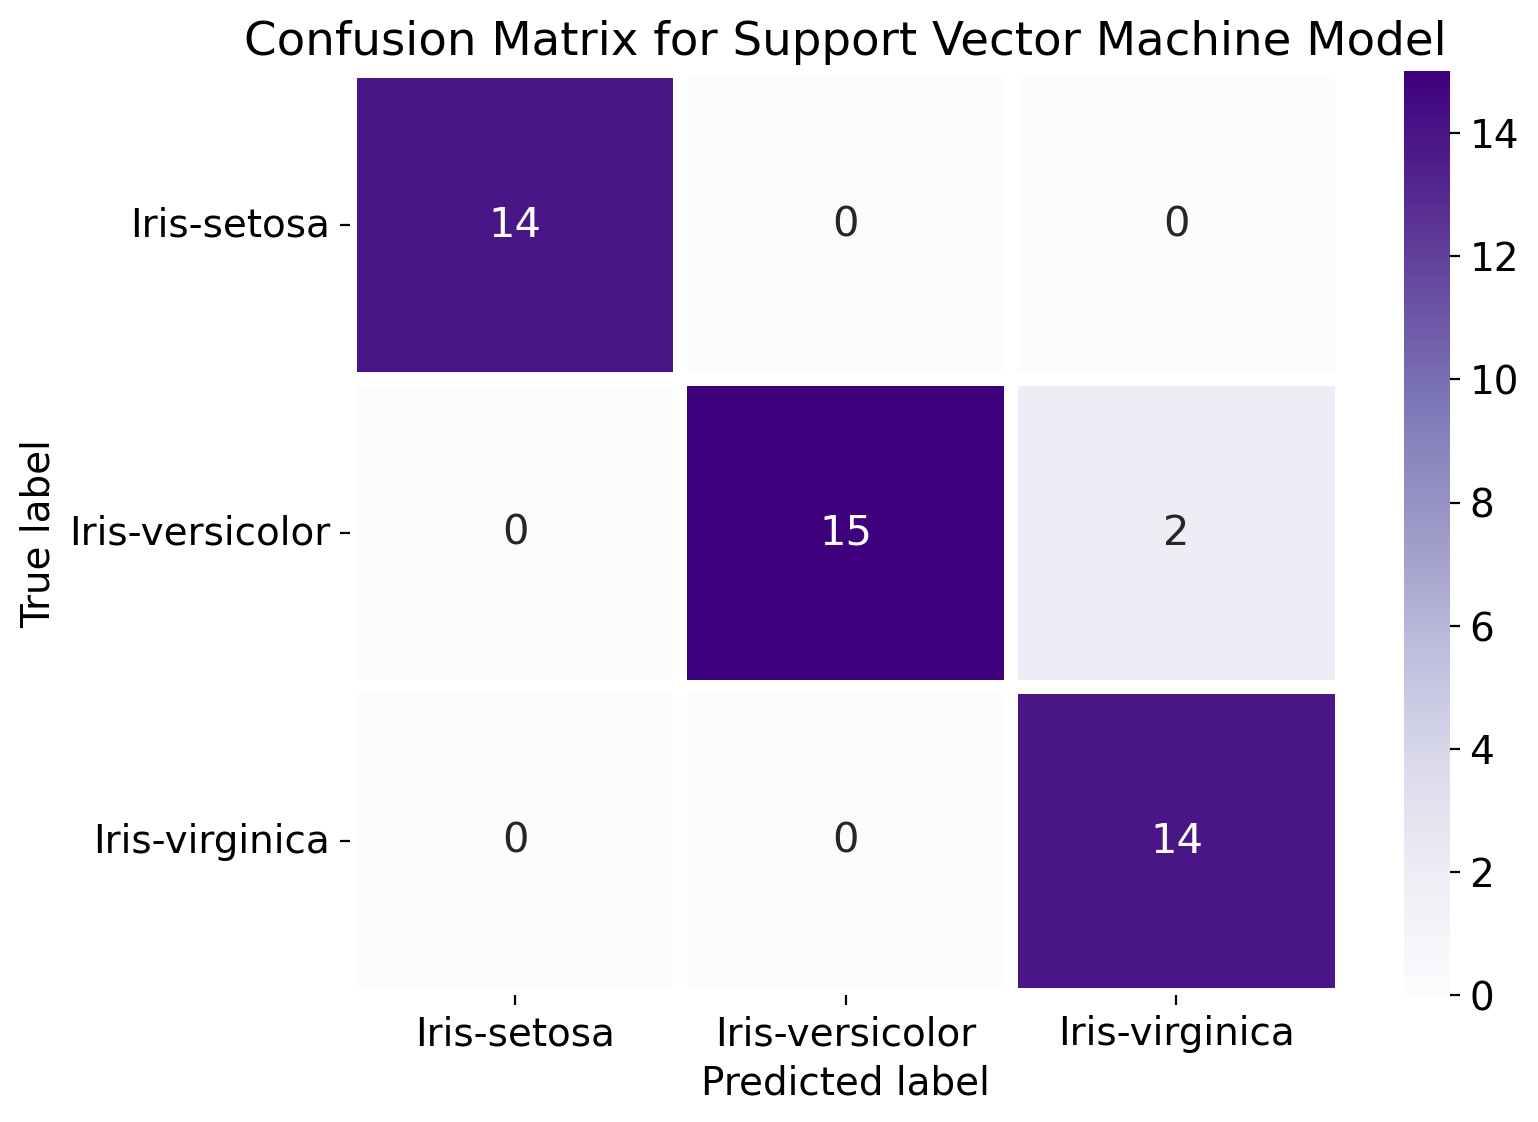

In [49]:
CM(y_test, SV_pred, col_names=col_names, model='Support Vector Machine')


In [50]:
print(classification_report(y_test, SV_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [51]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac, 2)

Accuracy
MLR      0.98
DT       0.96
KNN      0.96
GM       0.96
SVC      0.96

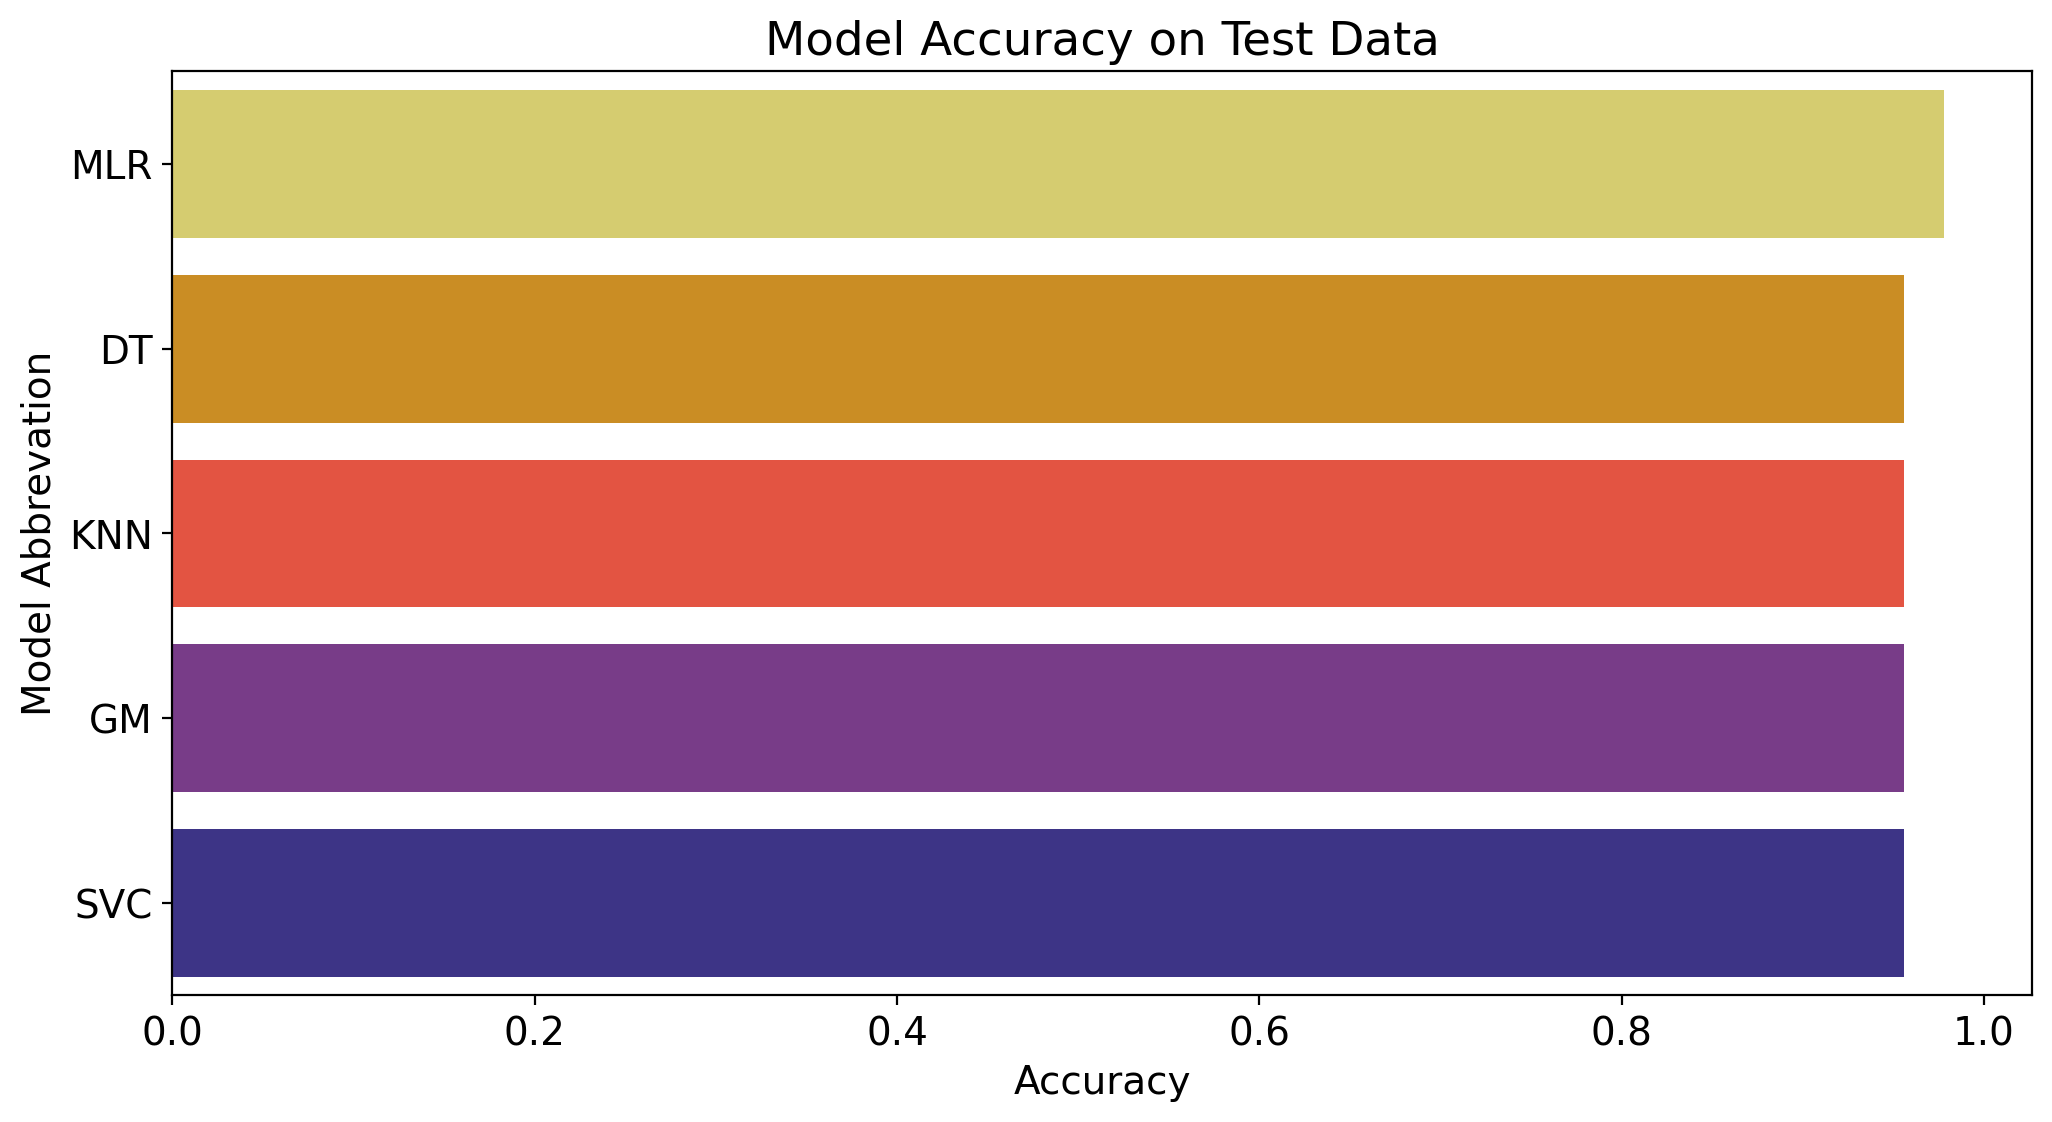

In [52]:
pl.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y=model_ac.index, data=model_ac, palette=pal)
pl.title('Model Accuracy on Test Data')
pl.ylabel('Model Abbrevation')
pl.show()

In [54]:
!pip install dataprep


Defaulting to user installation because normal site-packages is not writeable
                                              0.1/9.9 MB 8.8 kB/s eta 0:18:30


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\ProgramData\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\anaconda3\lib